# Lead-score generation:
#### Education company named X Education sells online courses to industry professionals (generating a lead-score, in order to understand the higher rate of opting for the courses i.e., higher the lead score higher is the conversion chance)

### Problem statement - To focus on how to increase the conversion to 80% or so, as the current data conversion rate is only about ~30%.

## 1- Importing the libraries and the data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
Leads_data = pd.read_csv('Leads.csv')
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1.1- Inspecting the data

In [3]:
Leads_data.shape

(9240, 37)

In [4]:
Leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2- Data cleaning

### 2.1- Replacing the Select values in the column with nan & inspecting the % of missing values

In [6]:
Leads_data=Leads_data.replace('Select', np.nan)

In [7]:
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### 2.2- Dropping the columns with higher missing value% (>40%)

In [8]:
Leads_data = Leads_data.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1)

### 2.3- Inspecting the distinctness of each column

In [9]:
Leads_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

### 2.4- Dropping the columns with all unique values & the columns with one value

In [10]:
Leads_data = Leads_data.drop(['Prospect ID','Lead Number','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1)

In [11]:
# Inspecting the data after dropping necessary columns

Leads_data.shape

(9240, 23)

In [12]:
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### 2.5 Checking the value counts of 'Country', 'Tags' & 'City'

In [13]:
print(Leads_data['Country'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Tags'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['City'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

### 2.6- Imputing the above three columns with appropriate 'mode', 'others' or 'not-mentioned'

In [14]:
Leads_data['Country'] = Leads_data['Country'].replace(['United States','United Arab Emirates','Singapore','Saudi Arabia','United Kingdom','Australia','Qatar','Bahrain','Hong Kong','Oman','France','Kuwait','South Africa','Canada','Nigeria','Germany','Sweden','Philippines','Uganda','Italy','Bangladesh','Netherlands','Asia/Pacific Region','China','Belgium','Ghana','Kenya','Sri Lanka','Tanzania','Malaysia','Liberia','Switzerland','Denmark','Russia','Vietnam','Indonesia'], 'Abroad-countries')
Leads_data['Country'] = Leads_data['Country'].replace('unknown','not-mentioned')

In [15]:
Leads_data['Tags'] = Leads_data['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Others')

In [16]:
Leads_data['City'] = Leads_data['City'].replace(['Thane & Outskirts','Other Cities','Other Cities of Maharashtra','Other Metro Cities','Tier II Cities'],'Other-cities')

In [17]:
Leads_data['Country'] = Leads_data['Country'].fillna('not-mentioned')
Leads_data['Tags'] = Leads_data['Tags'].fillna('not-mentioned')
Leads_data['City'] = Leads_data['City'].fillna('not-mentioned')

In [18]:
# Re-checking the above columns after the necessary modifications

print(Leads_data['Country'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Tags'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['City'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

India               6492
not-mentioned       2466
Abroad-countries     282
Name: Country, dtype: int64
*____________________*____________________*____________________*


not-mentioned                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64
*____________________*____________________*____________________*


not-mentioned    3669
Mumbai           3222
Other-cities     2349
Name: City, dtype: int64
*____________________*____________________*____________________*




In [19]:
# From the above inspection the above three columns looks kind of skewed, thus dropping the columns and mode being not-mentioned 

Leads_data = Leads_data.drop(['Country','Tags','City'], axis = 1)

### 2.7- Analysing the other columns

In [20]:
Leads_data['Specialization'] = Leads_data['Specialization'].fillna('not-mentioned')
Leads_data['What is your current occupation'] = Leads_data['What is your current occupation'].fillna('not-mentioned')
Leads_data['What matters most to you in choosing a course'] = Leads_data['What matters most to you in choosing a course'].fillna('not-mentioned')

#### 2.7.1 Imputing the above columns appropriately

In [21]:
Leads_data['Specialization'] = Leads_data['Specialization'].replace(['Retail Management','Rural and Agribusiness','E-Business','Services Excellence'],'Others')

In [22]:
Leads_data['What is your current occupation'] = Leads_data['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Unemployed')

In [23]:
Leads_data['What matters most to you in choosing a course'] = Leads_data['What matters most to you in choosing a course'].replace(['Flexibility & Convenience','Other'],'Better Career Prospects')

#### 2.7.2 Inspecting the above columns

In [24]:
print(Leads_data['Specialization'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['What is your current occupation'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['What matters most to you in choosing a course'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

not-mentioned                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Others                                270
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Name: Specialization, dtype: int64
*____________________*____________________*____________________*


Unemployed              5634
not-mentioned           2690
Working Professional     706
Student                  210
Name: What is your current occupation, dtype: int64
*____________________*____________________*_______________

### 2.8- Inspecting the columns with 2-value_counts

In [25]:
print(Leads_data['Do Not Email'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Do Not Call'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Search'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Newspaper Article'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['X Education Forums'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Newspaper'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Digital Advertisement'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Through Recommendations'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['A free copy of Mastering The Interview'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

No     8506
Yes     734
Name: Do Not Email, dtype: int64
*____________________*____________________*____________________*


No     9238
Yes       2
Name: Do Not Call, dtype: int64
*____________________*____________________*____________________*


No     9226
Yes      14
Name: Search, dtype: int64
*____________________*____________________*____________________*


No     9238
Yes       2
Name: Newspaper Article, dtype: int64
*____________________*____________________*____________________*


No     9239
Yes       1
Name: X Education Forums, dtype: int64
*____________________*____________________*____________________*


No     9239
Yes       1
Name: Newspaper, dtype: int64
*____________________*____________________*____________________*


No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
*____________________*____________________*____________________*


No     9233
Yes       7
Name: Through Recommendations, dtype: int64
*____________________*____________________*___________

In [26]:
# Dropping the columns with skewed values from the above results

Leads_data = Leads_data.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations'], axis = 1)

In [27]:
# Droping the rows with ~1-2% missing values

Leads_data = Leads_data.dropna()

In [28]:
# Finally re-checking the missing values

round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

### 2.9- Inspecting other columns

In [29]:
print(Leads_data['Lead Origin'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Lead Source'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Last Activity'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

print(Leads_data['Last Notable Activity'].value_counts())
print('*____________________*____________________*____________________*')
print('\n')

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
*____________________*____________________*____________________*


Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
*____________________*____________________*____________________*


Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on W

In [30]:
# The 'Last activity' and the 'Last notable activity' columns are similar so dropping one of the coulmn

Leads_data = Leads_data.drop(['Last Notable Activity'], axis = 1)

#### 2.9.1 Imputing the values

In [31]:
Leads_data['Lead Origin'] = Leads_data['Lead Origin'].replace('Lead Import','Landing Page Submission')
Leads_data['Lead Origin'].value_counts()

Landing Page Submission    4915
API                        3578
Lead Add Form               581
Name: Lead Origin, dtype: int64

In [32]:
Leads_data['Lead Source'] = Leads_data['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Google')
Leads_data['Lead Source'].value_counts()

Google            3181
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Name: Lead Source, dtype: int64

In [33]:
Leads_data['Last Activity'] = Leads_data['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')
Leads_data['Last Activity'].value_counts()

Email Opened               3432
SMS Sent                   2716
Olark Chat Conversation     972
Page Visited on Website     640
Converted to Lead           428
Email Bounced               312
Others                      307
Email Link Clicked          267
Name: Last Activity, dtype: int64

#### 2.9.2 Inspecting the data after imputation

In [34]:
Leads_data.shape

(9074, 12)

In [35]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 

## 3- EDA

### 3.1- Importing the libraries

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2- Univariate analysis
##### To inspect if the presence of unnecessary categorical columns

<AxesSubplot:xlabel='Do Not Email', ylabel='count'>

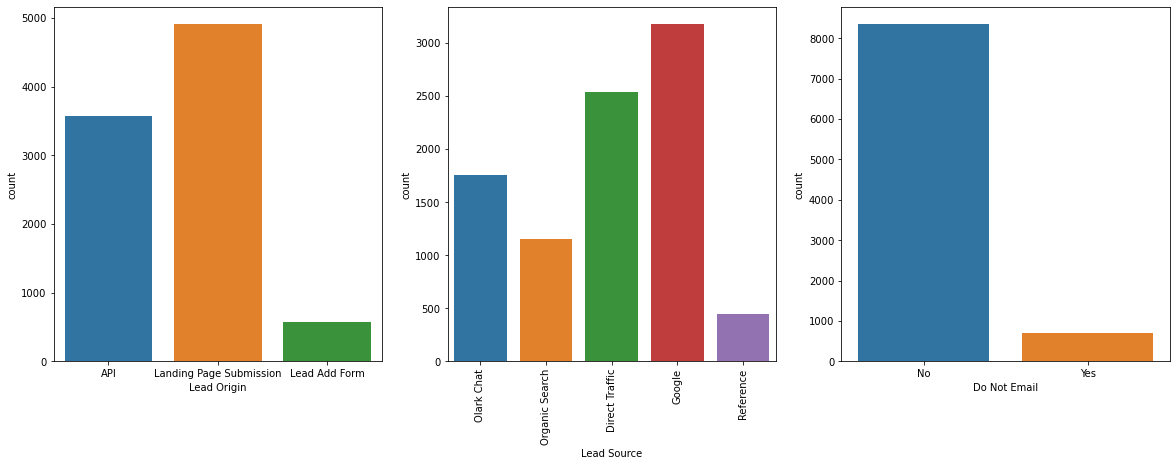

In [37]:
plt.figure(figsize = (20,30))

plt.subplot(4,3,1)
sns.countplot(Leads_data['Lead Origin'])

plt.subplot(4,3,2)
sns.countplot(Leads_data['Lead Source']).tick_params(axis='x', rotation = 90)

plt.subplot(4,3,3)
sns.countplot(Leads_data['Do Not Email'])

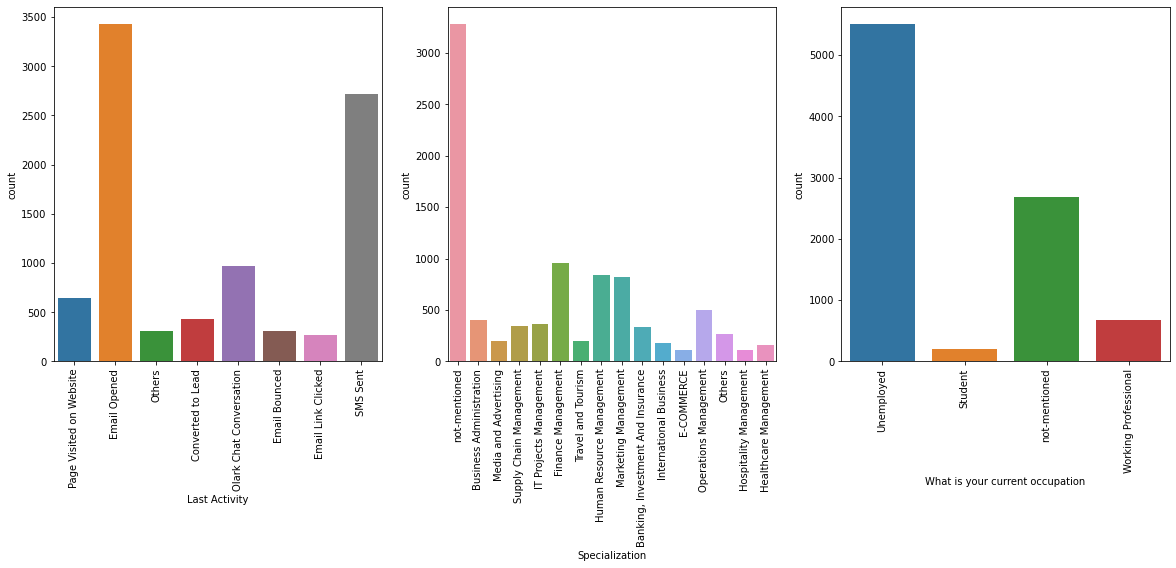

In [38]:
plt.figure(figsize = (20,30))

plt.subplot(4,3,4)
sns.countplot(Leads_data['Last Activity']).tick_params(axis='x', rotation = 90)

plt.subplot(4,3,5)
sns.countplot(Leads_data['Specialization']).tick_params(axis='x', rotation = 90)

plt.subplot(4,3,6)
sns.countplot(Leads_data['What is your current occupation']).tick_params(axis='x', rotation = 90)

<AxesSubplot:xlabel='A free copy of Mastering The Interview', ylabel='count'>

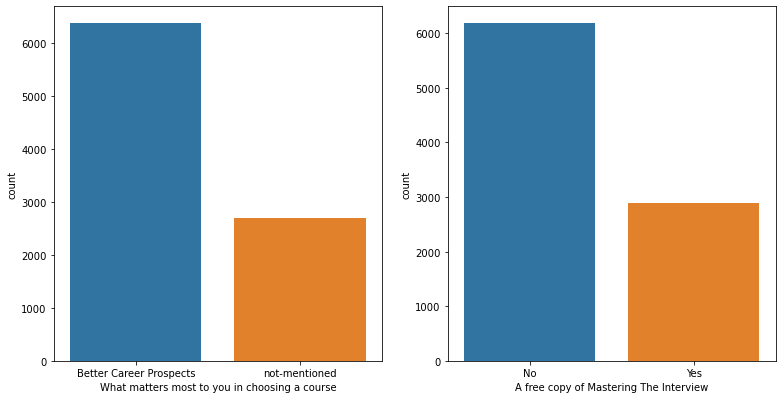

In [40]:
plt.figure(figsize = (20,30))

plt.subplot(4,3,7)
sns.countplot(Leads_data['What matters most to you in choosing a course'])

plt.subplot(4,3,8)
sns.countplot(Leads_data['A free copy of Mastering The Interview'])

### 3.3- Bivariate analysis
##### Analysing the effect of the various Categorical variables on Target variable - 'Converted' 

<AxesSubplot:xlabel='Do Not Email', ylabel='count'>

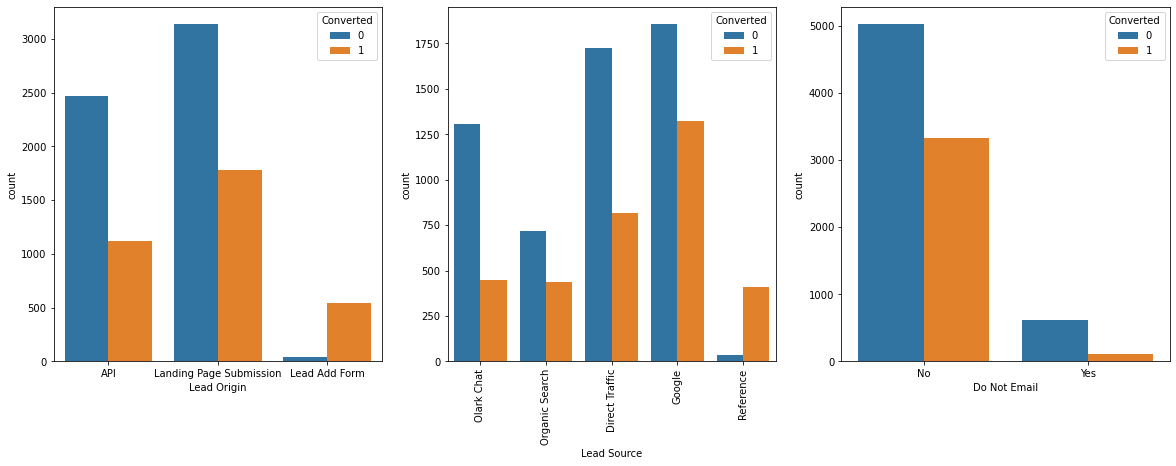

In [41]:
plt.figure(figsize = (20,30))

plt.subplot(4,3,1)
sns.countplot(Leads_data['Lead Origin'], hue='Converted', data= Leads_data)

plt.subplot(4,3,2)
sns.countplot(Leads_data['Lead Source'], hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)

plt.subplot(4,3,3)
sns.countplot(Leads_data['Do Not Email'], hue='Converted', data= Leads_data)

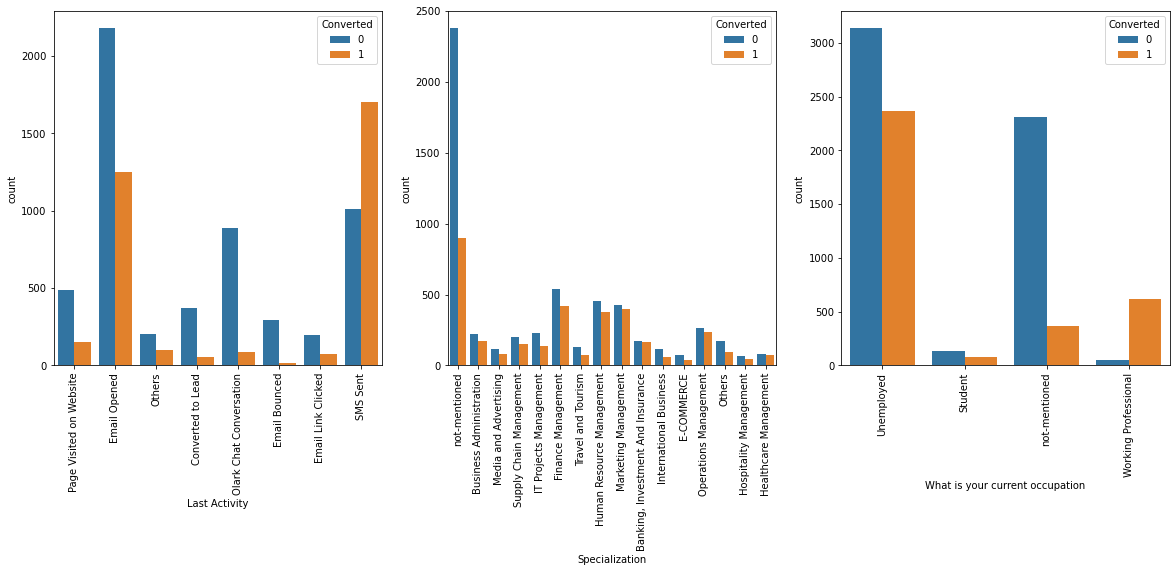

In [42]:
plt.figure(figsize = (20,30))

plt.subplot(4,3,4)
sns.countplot(Leads_data['Last Activity'], hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)

plt.subplot(4,3,5)
sns.countplot(Leads_data['Specialization'], hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)

plt.subplot(4,3,6)
sns.countplot(Leads_data['What is your current occupation'], hue='Converted', data= Leads_data).tick_params(axis='x', rotation = 90)

<AxesSubplot:xlabel='A free copy of Mastering The Interview', ylabel='count'>

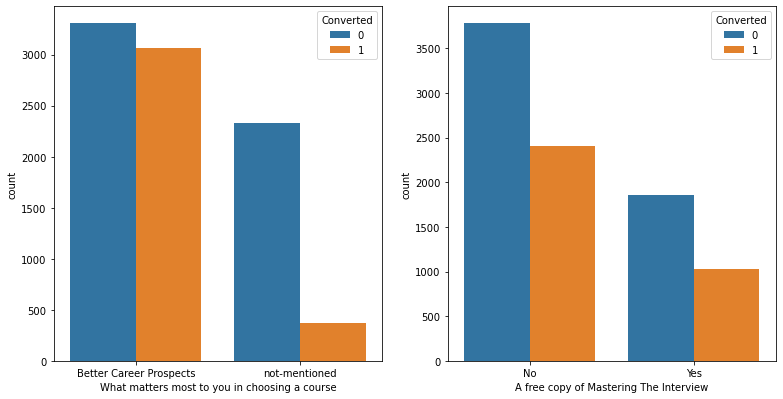

In [44]:
plt.figure(figsize = (20,30))

plt.subplot(4,3,7)
sns.countplot(Leads_data['What matters most to you in choosing a course'], hue='Converted', data= Leads_data)

plt.subplot(4,3,8)
sns.countplot(Leads_data['A free copy of Mastering The Interview'], hue='Converted', data= Leads_data)

### 3.4- Multivariate analysis
##### Inspecting the correlation between numerical variables

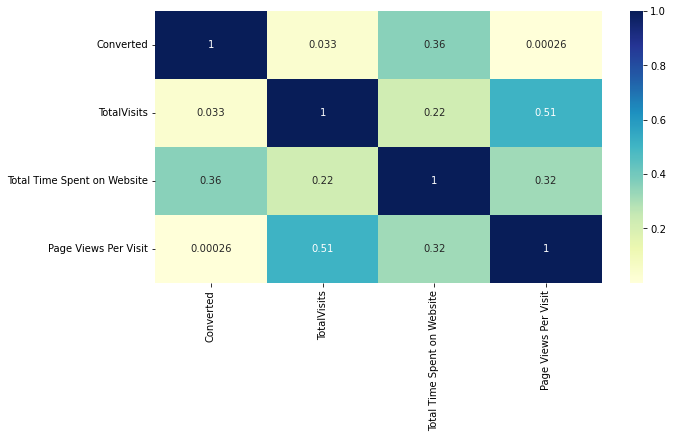

In [129]:
plt.figure(figsize=(10,5))
sns.heatmap(Leads_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### 3.5- Analysing the Numerical variables for the outliers

In [46]:
numerical_var = Leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numerical_var.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


### 3.6- Effect of numerical variables on the target variable

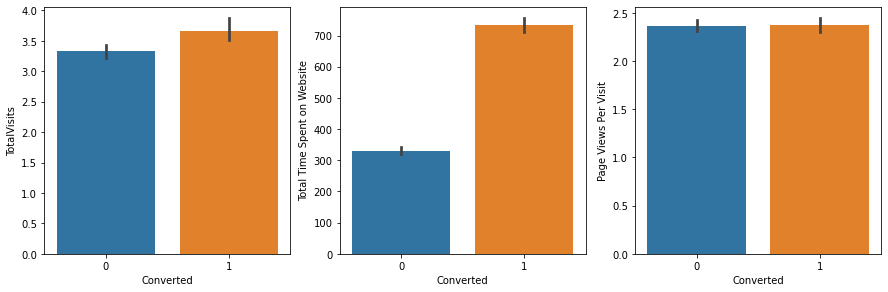

In [47]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.barplot(y = 'TotalVisits', x = 'Converted', data = Leads_data)
plt.subplot(2,3,2)
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads_data)
plt.subplot(2,3,3)
sns.barplot(y = 'Page Views Per Visit', x = 'Converted', data = Leads_data)
plt.show()

## 4- Creating Dummy variables

In [48]:
# Re-checking the data

Leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,not-mentioned,Unemployed,Better Career Prospects,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,not-mentioned,Unemployed,Better Career Prospects,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,not-mentioned,Unemployed,Better Career Prospects,No


In [49]:
# Creating a list of categorical variables to create dummy variables

Leads_data.loc[:, Leads_data.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [50]:
dummy = pd.get_dummies(Leads_data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'A free copy of Mastering The Interview']], drop_first=True)

df_final = pd.concat([Leads_data, dummy], axis=1)
df_final

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not-mentioned,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not-mentioned,What matters most to you in choosing a course_not-mentioned,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,not-mentioned,Unemployed,...,0,0,0,0,1,1,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,not-mentioned,Unemployed,...,0,0,0,0,1,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,not-mentioned,Unemployed,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,IT Projects Management,Unemployed,...,0,0,0,0,0,1,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,...,0,0,0,0,0,1,0,0,0,1
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,...,0,0,0,0,0,1,0,0,0,1
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,not-mentioned,...,0,0,0,0,0,0,0,1,1,0


In [51]:
# Dropping the unnecessary columns after creating dummy variables

df_final = df_final.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'A free copy of Mastering The Interview'], axis = 1)
df_final

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not-mentioned,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not-mentioned,What matters most to you in choosing a course_not-mentioned,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.00,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.00,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9237,0,2.0,199,2.00,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9238,1,3.0,499,3.00,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


## 5- Creating Train Test split

In [52]:
# importing the libraries

from sklearn.model_selection import train_test_split

In [53]:
# creating x-variables

x = df_final.drop('Converted', axis=1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Do Not Email_Yes,...,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not-mentioned,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not-mentioned,What matters most to you in choosing a course_not-mentioned,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [54]:
# creating y-variable

y = df_final['Converted']

In [55]:
# spillting the train as 70% and test as 30% of the data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### 5.1- Scaling using MinMax

In [56]:
# importing libraries for scaling

from sklearn.preprocessing import MinMaxScaler

In [57]:
# inspecting the data after scaling

scaler = MinMaxScaler()
x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Do Not Email_Yes,...,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not-mentioned,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not-mentioned,What matters most to you in choosing a course_not-mentioned,A free copy of Mastering The Interview_Yes
3009,0.007968,0.178347,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1012,0.007968,0.085355,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
9226,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7987,0.019920,0.711590,0.104167,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


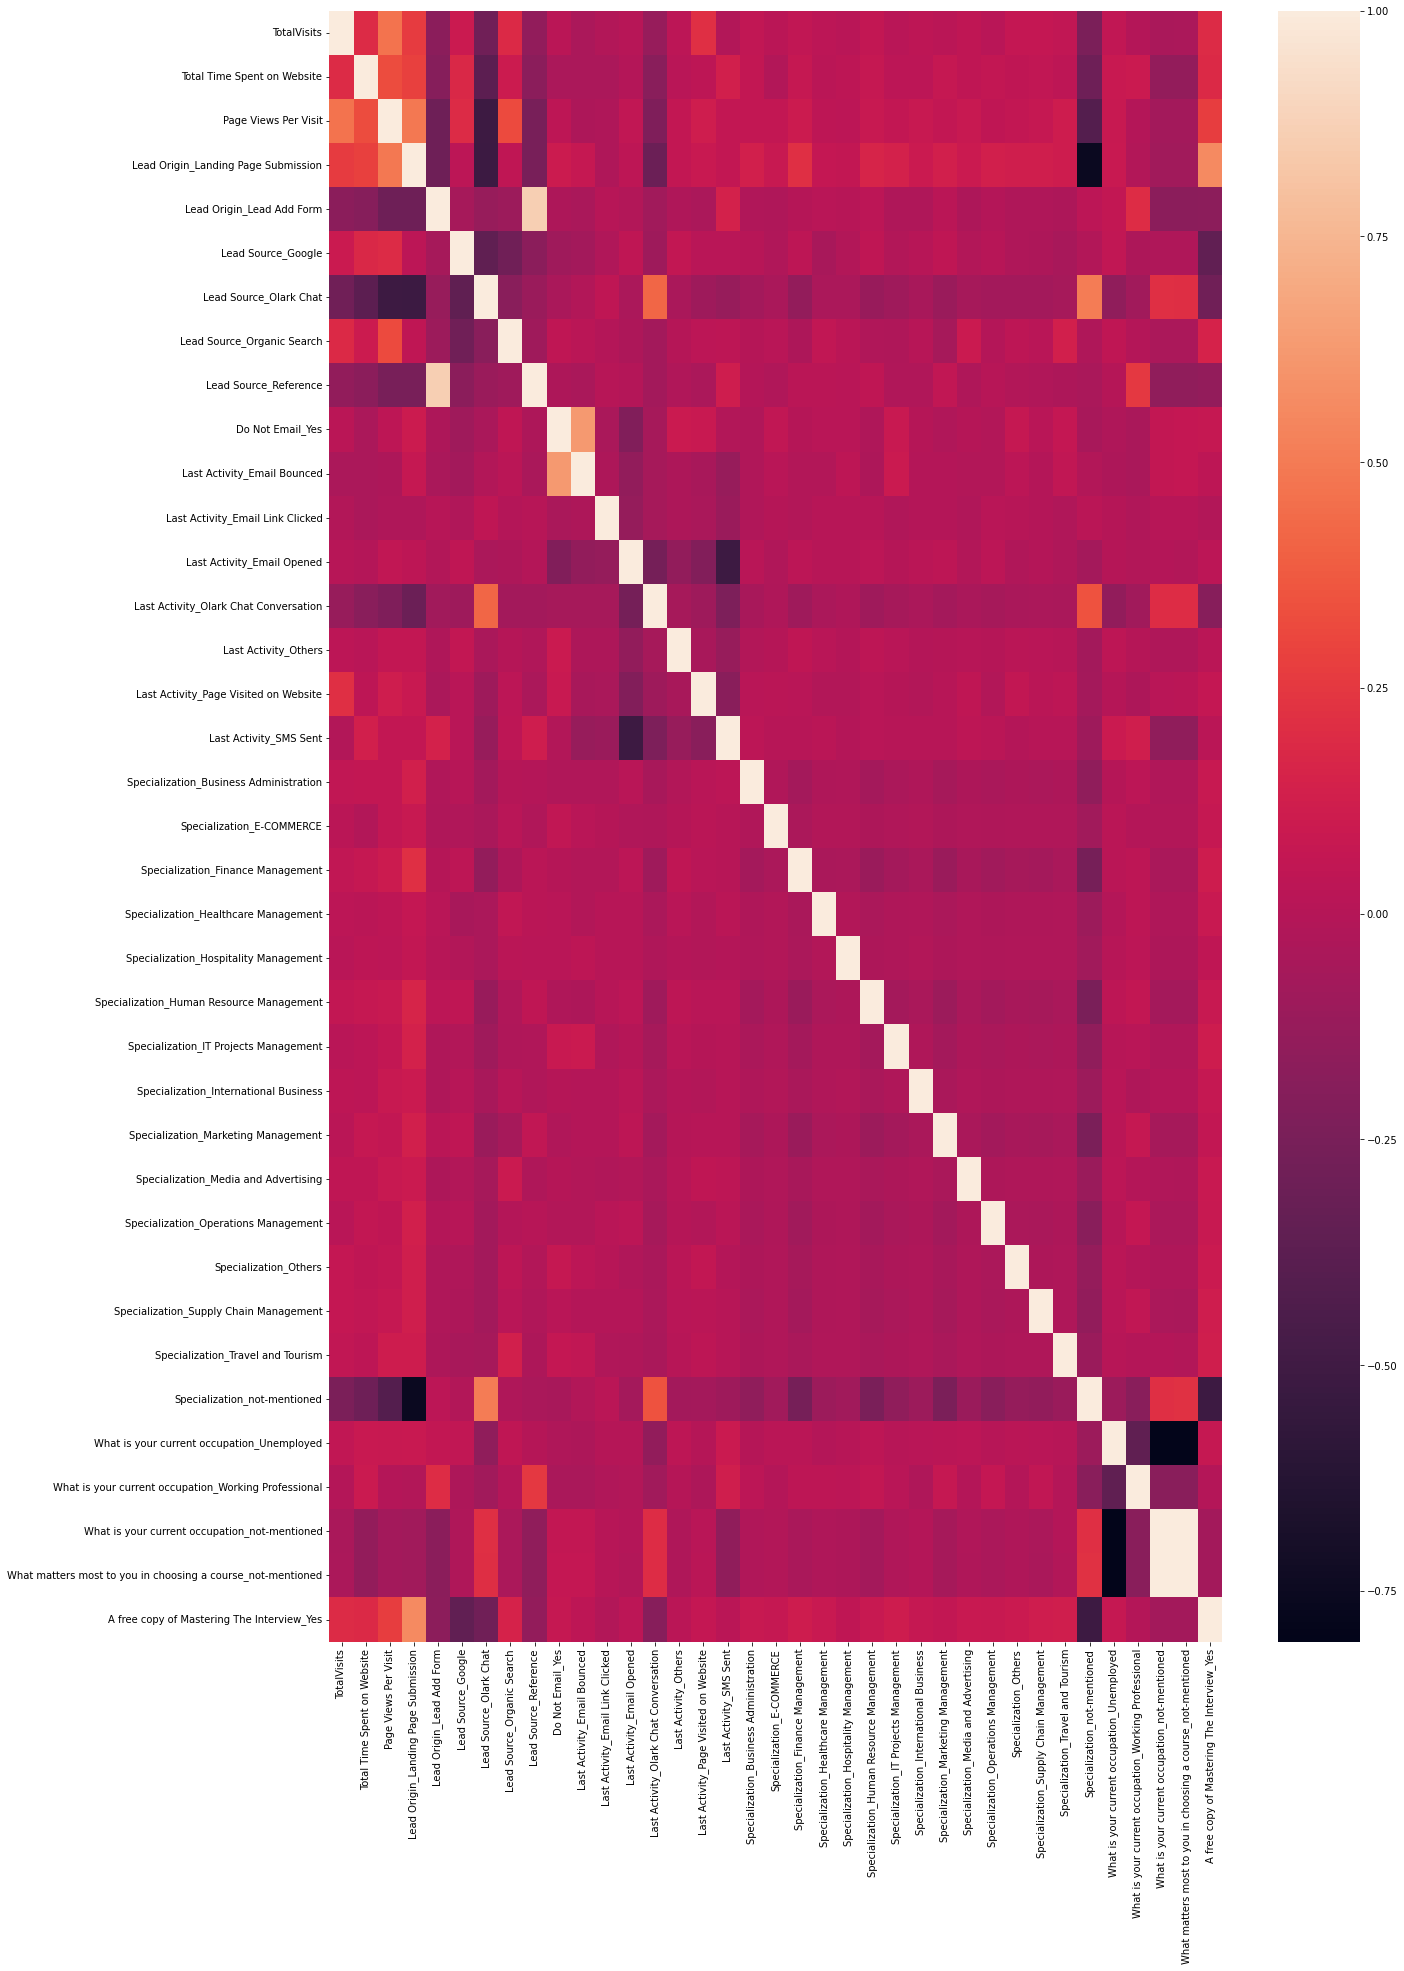

In [58]:
# inspecting the correlation of the data with heatmap

plt.figure(figsize=(20,30))
sns.heatmap(x_train.corr())
plt.show()

## 6- Model building

In [59]:
# importing the libraries for building a logistic regression model

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(x_train, y_train)

In [60]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Reference', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_Finance Management', False, 14),
 ('Specialization_Healthcare Management', False, 18),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', F

In [61]:
column = x_train.columns[rfe.support_]
x_train = x_train[column]

### 6.1- Model: 1

In [62]:
# creating the constant

import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
logm1 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.0
Date:                Tue, 25 Oct 2022   Deviance:                       5078.1
Time:                        15:36:31   Pearson chi2:                 6.37e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -2.4775      0.244    -10.167      0.000      -2.955      -2.000
TotalVisits                                                     9.9579      2.436      4.087      0.000       5.183      14.733
Total Time Spent on Website                                     4.5311      0.168     26.926      0.000       4.201       4.861
Page Views Per Visit                                           -1.7153      0.576     -2.977      0.003      -2.844      -0.586
Lead Origin_Landing Page Submission                            -0.8069      0.132     -6.100      0.000      -1.066      -0.548
Lead Origin_Lead Add Form                                       4.6428      0.540      8.601      0.000       3.585       5.701
Lead Source_Google                                              0.2821      0.083      3.418      0.001       0.120       0.444
Lead Source_Olark Chat                                          1.3820      0.150      9.213      0.000       1.088       1.676
Lead Source_Reference                                          -1.4055      0.580     -2.424      0.015      -2.542      -0.269
Do Not Email_Yes                                               -1.3483      0.187     -7.215      0.000      -1.715      -0.982
Last Activity_Email Link Clicked                                0.7680      0.287      2.673      0.008       0.205       1.331
Last Activity_Email Opened                                      1.2196      0.204      5.992      0.000       0.821       1.619
Last Activity_Olark Chat Conversation                          -0.2570      0.255     -1.008      0.314      -0.757       0.243
Last Activity_Others                                            1.4528      0.263      5.532      0.000       0.938       1.968
Last Activity_Page Visited on Website                           0.6612      0.245      2.703      0.007       0.182       1.141
Last Activity_SMS Sent                                          2.3910      0.204     11.747      0.000       1.992       2.790
Specialization_Hospitality Management                          -0.4701      0.328     -1.435      0.151      -1.112       0.172
Specialization_Media and Advertising                           -0.3088      0.228     -1.357      0.175      -0.755       0.137
Specialization_not-mentioned                                   -0.8444      0.128     -6.579      0.000      -1.096      -0.593
What is your current occupation_Working Professional            2.4232      0.194     12.483      0.000       2.043       2.804
What matters most to you in choosing a course_not-mentioned    -1.2526      0.089    -14.032      0.000      -1.428      -1.078
===========

In [63]:
# importing and creating the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Opened,4.85
3,Lead Origin_Landing Page Submission,4.74
4,Lead Origin_Lead Add Form,4.72
7,Lead Source_Reference,4.51
2,Page Views Per Visit,4.32
14,Last Activity_SMS Sent,4.24
17,Specialization_not-mentioned,3.37
6,Lead Source_Olark Chat,2.97
11,Last Activity_Olark Chat Conversation,2.43
1,Total Time Spent on Website,2.24


### 6.2- Model: 2

In [65]:
# dropping 'Last Activity_Olark Chat Conversation' with high p-value>.05 and inspecting the p-value and VIF

x_train.drop('Last Activity_Olark Chat Conversation', axis = 1, inplace = True)

In [66]:
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.5
Date:                Tue, 25 Oct 2022   Deviance:                       5079.1
Time:                        15:37:46   Pearson chi2:                 6.39e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -2.6238      0.199    -13.170      0.000      -3.014      -2.233
TotalVisits                                                     9.8283      2.427      4.050      0.000       5.072      14.585
Total Time Spent on Website                                     4.5315      0.168     26.905      0.000       4.201       4.862
Page Views Per Visit                                           -1.7605      0.575     -3.063      0.002      -2.887      -0.634
Lead Origin_Landing Page Submission                            -0.8023      0.132     -6.069      0.000      -1.061      -0.543
Lead Origin_Lead Add Form                                       4.6399      0.541      8.572      0.000       3.579       5.701
Lead Source_Google                                              0.2780      0.083      3.369      0.001       0.116       0.440
Lead Source_Olark Chat                                          1.3575      0.148      9.177      0.000       1.068       1.647
Lead Source_Reference                                          -1.4156      0.581     -2.436      0.015      -2.555      -0.277
Do Not Email_Yes                                               -1.3237      0.186     -7.122      0.000      -1.688      -0.959
Last Activity_Email Link Clicked                                0.9269      0.243      3.820      0.000       0.451       1.402
Last Activity_Email Opened                                      1.3769      0.135     10.199      0.000       1.112       1.641
Last Activity_Others                                            1.6049      0.218      7.369      0.000       1.178       2.032
Last Activity_Page Visited on Website                           0.8160      0.193      4.219      0.000       0.437       1.195
Last Activity_SMS Sent                                          2.5459      0.138     18.470      0.000       2.276       2.816
Specialization_Hospitality Management                          -0.4671      0.328     -1.424      0.154      -1.110       0.176
Specialization_Media and Advertising                           -0.3121      0.228     -1.371      0.170      -0.758       0.134
Specialization_not-mentioned                                   -0.8455      0.128     -6.591      0.000      -1.097      -0.594
What is your current occupation_Working Professional            2.4309      0.195     12.498      0.000       2.050       2.812
What matters most to you in choosing a course_not-mentioned    -1.2543      0.089    -14.059      0.000      -1.429      -1.079
===============================================================================================================================
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.68
7,Lead Source_Reference,4.45
3,Lead Origin_Landing Page Submission,4.17
2,Page Views Per Visit,4.10
10,Last Activity_Email Opened,3.01
16,Specialization_not-mentioned,2.93
13,Last Activity_SMS Sent,2.82
6,Lead Source_Olark Chat,2.20
1,Total Time Spent on Website,2.19
0,TotalVisits,1.94


### 6.3- Model: 3

In [68]:
# dropping 'Specialization_Hospitality Management' with high p-value>0.05 and inspecting the p-value and VIF

x_train.drop('Specialization_Hospitality Management', axis = 1, inplace = True)

In [69]:
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.6
Date:                Tue, 25 Oct 2022   Deviance:                       5081.1
Time:                        15:38:39   Pearson chi2:                 6.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -2.6317      0.199    -13.216      0.000      -3.022      -2.241
TotalVisits                                                     9.7583      2.419      4.034      0.000       5.017      14.500
Total Time Spent on Website                                     4.5220      0.168     26.894      0.000       4.192       4.852
Page Views Per Visit                                           -1.7498      0.574     -3.047      0.002      -2.875      -0.624
Lead Origin_Landing Page Submission                            -0.8016      0.132     -6.064      0.000      -1.061      -0.542
Lead Origin_Lead Add Form                                       4.6372      0.541      8.566      0.000       3.576       5.698
Lead Source_Google                                              0.2788      0.082      3.380      0.001       0.117       0.440
Lead Source_Olark Chat                                          1.3549      0.148      9.164      0.000       1.065       1.645
Lead Source_Reference                                          -1.4270      0.581     -2.456      0.014      -2.566      -0.288
Do Not Email_Yes                                               -1.3270      0.186     -7.142      0.000      -1.691      -0.963
Last Activity_Email Link Clicked                                0.9280      0.243      3.826      0.000       0.453       1.403
Last Activity_Email Opened                                      1.3785      0.135     10.211      0.000       1.114       1.643
Last Activity_Others                                            1.6077      0.218      7.381      0.000       1.181       2.035
Last Activity_Page Visited on Website                           0.8238      0.193      4.265      0.000       0.445       1.202
Last Activity_SMS Sent                                          2.5477      0.138     18.485      0.000       2.278       2.818
Specialization_Media and Advertising                           -0.3037      0.227     -1.336      0.182      -0.749       0.142
Specialization_not-mentioned                                   -0.8362      0.128     -6.529      0.000      -1.087      -0.585
What is your current occupation_Working Professional            2.4230      0.194     12.462      0.000       2.042       2.804
What matters most to you in choosing a course_not-mentioned    -1.2543      0.089    -14.061      0.000      -1.429      -1.079
===============================================================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.68
7,Lead Source_Reference,4.45
3,Lead Origin_Landing Page Submission,4.17
2,Page Views Per Visit,4.10
10,Last Activity_Email Opened,3.01
15,Specialization_not-mentioned,2.93
13,Last Activity_SMS Sent,2.82
6,Lead Source_Olark Chat,2.20
1,Total Time Spent on Website,2.19
0,TotalVisits,1.94


### 6.4- Model: 4

In [71]:
# dropping 'Specialization_Media and Advertising' with high p-value>0.05 and inspecting the p-value and VIF

x_train.drop('Specialization_Media and Advertising', axis = 1, inplace = True)

In [72]:
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.5
Date:                Tue, 25 Oct 2022   Deviance:                       5082.9
Time:                        15:40:55   Pearson chi2:                 6.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -2.6384      0.199    -13.255      0.000      -3.029      -2.248
TotalVisits                                                     9.7931      2.420      4.047      0.000       5.050      14.536
Total Time Spent on Website                                     4.5208      0.168     26.891      0.000       4.191       4.850
Page Views Per Visit                                           -1.7707      0.575     -3.081      0.002      -2.897      -0.644
Lead Origin_Landing Page Submission                            -0.8011      0.132     -6.062      0.000      -1.060      -0.542
Lead Origin_Lead Add Form                                       4.6351      0.541      8.564      0.000       3.574       5.696
Lead Source_Google                                              0.2813      0.082      3.411      0.001       0.120       0.443
Lead Source_Olark Chat                                          1.3546      0.148      9.162      0.000       1.065       1.644
Lead Source_Reference                                          -1.4231      0.581     -2.450      0.014      -2.562      -0.285
Do Not Email_Yes                                               -1.3266      0.186     -7.138      0.000      -1.691      -0.962
Last Activity_Email Link Clicked                                0.9295      0.242      3.834      0.000       0.454       1.405
Last Activity_Email Opened                                      1.3763      0.135     10.200      0.000       1.112       1.641
Last Activity_Others                                            1.6005      0.218      7.345      0.000       1.173       2.028
Last Activity_Page Visited on Website                           0.8175      0.193      4.236      0.000       0.439       1.196
Last Activity_SMS Sent                                          2.5419      0.138     18.462      0.000       2.272       2.812
Specialization_not-mentioned                                   -0.8261      0.128     -6.465      0.000      -1.077      -0.576
What is your current occupation_Working Professional            2.4223      0.194     12.466      0.000       2.041       2.803
What matters most to you in choosing a course_not-mentioned    -1.2537      0.089    -14.062      0.000      -1.428      -1.079
===============================================================================================================================
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.68
7,Lead Source_Reference,4.45
3,Lead Origin_Landing Page Submission,4.16
2,Page Views Per Visit,4.09
10,Last Activity_Email Opened,3.01
14,Specialization_not-mentioned,2.92
13,Last Activity_SMS Sent,2.81
6,Lead Source_Olark Chat,2.20
1,Total Time Spent on Website,2.19
0,TotalVisits,1.94


### 6.5- Creating y-train predicted

In [74]:
y_train_predicted = res.predict(x_train_sm)
y_train_predicted[:10]

3009    0.070426
1012    0.016186
9226    0.606346
4750    0.641489
7987    0.911332
1281    0.800690
2880    0.041814
4971    0.954020
7536    0.855711
1248    0.888267
dtype: float64

In [75]:
y_train_predicted = y_train_predicted.values.reshape(-1)
y_train_predicted[:10]

array([0.07042582, 0.01618576, 0.60634633, 0.64148932, 0.91133216,
       0.80069005, 0.04181422, 0.95401982, 0.85571057, 0.88826725])

In [76]:
y_train_predicted_final = pd.DataFrame({'Converted' : y_train.values, 'Conversion_Prob' : y_train_predicted})
y_train_predicted_final.head()

,Converted,Conversion_Prob
0,0,0.070426
1,0,0.016186
2,0,0.606346
3,1,0.641489
4,1,0.911332


In [77]:
# prdicting y with a random cut-off x=0.5

y_train_predicted_final['Predicted'] = y_train_predicted_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predicted_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.070426,0
1,0,0.016186,0
2,0,0.606346,1
3,1,0.641489,1
4,1,0.911332,1


## 7- Model Evaluation

### 7.1- Creating the confusion matrix for the train set

In [78]:
from sklearn import metrics

### 7.2- Confusion matrix for y with a random cut-off x=0.5

In [79]:
confusion = metrics.confusion_matrix(y_train_predicted_final.Converted, y_train_predicted_final.Predicted )
confusion

array([[3452,  453],
       [ 709, 1737]], dtype=int64)

In [80]:
# Accuracy
metrics.accuracy_score(y_train_predicted_final.Converted, y_train_predicted_final.Predicted)

0.8170366871358841

In [81]:
# Assigning the TP, TN, FP & FN from the confusion matrix

# TP - True positive
TP = confusion[1,1]

# TN - True negative
TN = confusion[0,0]

# FP - False positive
FP = confusion[0,1] 

# FN - False negative
FN = confusion[1,0]

In [82]:
# Sensitivity
TP/(TP+FN)

0.7101390024529844

In [83]:
# Specificity
TN/(TN+FP)

0.8839948783610756

### 7.3- ROC

In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [85]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_predicted_final.Converted, y_train_predicted_final.Conversion_Prob, drop_intermediate = False )

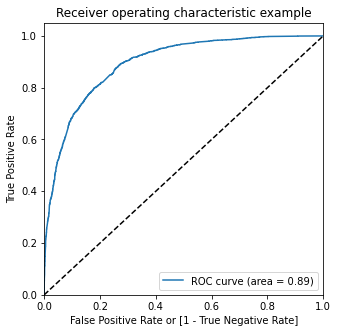

In [86]:
draw_roc(y_train_predicted_final.Converted, y_train_predicted_final.Conversion_Prob)

In [87]:
# predicting y for a range of x

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predicted_final[i]= y_train_predicted_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_predicted_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.070426,0,1,0,0,0,0,0,0,0,0,0
1,0,0.016186,0,1,0,0,0,0,0,0,0,0,0
2,0,0.606346,1,1,1,1,1,1,1,1,0,0,0
3,1,0.641489,1,1,1,1,1,1,1,1,0,0,0
4,1,0.911332,1,1,1,1,1,1,1,1,1,1,1


In [88]:
cutoff_df = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predicted_final.Converted, y_train_predicted_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.622107,0.981603,0.396927
0.2,0.2,0.762085,0.923549,0.660948
0.3,0.3,0.793733,0.873262,0.743918
0.4,0.4,0.814832,0.777596,0.838156
0.5,0.5,0.817037,0.710139,0.883995
0.6,0.6,0.811211,0.646770,0.914213
0.7,0.7,0.788537,0.538021,0.945455
0.8,0.8,0.758778,0.427637,0.966197
0.9,0.9,0.717210,0.286182,0.987196


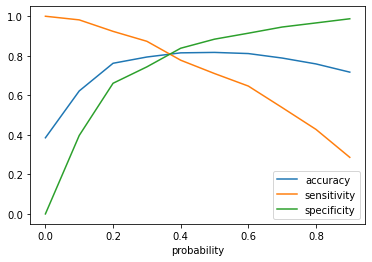

In [89]:
# cut-off graph

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

### From the above graph we can consider a cut-off x=0.35 for our further predictions

### 7.4- Creating and analysing the efficacy of the model with cut-off x=0.35

In [90]:
y_train_predicted_final['final_predicted'] = y_train_predicted_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_predicted_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.070426,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.016186,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.606346,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.641489,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.911332,1,1,1,1,1,1,1,1,1,1,1,1


In [91]:
# Accuracy
metrics.accuracy_score(y_train_predicted_final.Converted, y_train_predicted_final.final_predicted)

0.807746811525744

In [92]:
confusion1 = metrics.confusion_matrix(y_train_predicted_final.Converted, y_train_predicted_final.final_predicted )
confusion1

array([[3155,  750],
       [ 471, 1975]], dtype=int64)

In [93]:
# True positive
TP = confusion1[1,1]

# True negative
TN = confusion1[0,0]

# False positive
FP = confusion1[0,1] 

# False negative
FN = confusion1[1,0]

In [94]:
# Sensitivity
TP/(TP+FN)

0.8074407195421096

In [95]:
# Specificity
TN/(TN+FP)

0.8079385403329066

### 7.5- Analysing the above results on the test data set

In [96]:
x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [97]:
col = x_train.columns

x_test = x_test[col]

x_test_sm = sm.add_constant(x_test[col])

In [98]:
x_test_sm.shape

(2723, 18)

In [99]:
y_test_predicted = res.predict(x_test_sm)

y_predicted_df = pd.DataFrame(y_test_predicted)

y_test_df = pd.DataFrame(y_test)

y_predicted_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_predicted_final = pd.concat([y_test_df, y_predicted_df],axis=1)
 
y_predicted_final= y_predicted_final.rename(columns = {0 : 'Conversion_Prob'})
y_predicted_final.head()

,Converted,Conversion_Prob
0,0,0.053108
1,1,0.962960
2,0,0.048342
3,1,0.875446
4,0,0.036900


In [100]:
y_predicted_final['final_predicted'] = y_predicted_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_predicted_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.053108,0
1,1,0.962960,1
2,0,0.048342,0
3,1,0.875446,1
4,0,0.036900,0


In [101]:
# Accuracy
metrics.accuracy_score(y_predicted_final['Converted'], y_predicted_final.final_predicted)

0.8130738156445098

In [102]:
confusion2 = metrics.confusion_matrix(y_predicted_final['Converted'], y_predicted_final.final_predicted )
confusion2

array([[1419,  315],
       [ 194,  795]], dtype=int64)

In [103]:
TP = confusion2[1,1]

TN = confusion2[0,0]

FP = confusion2[0,1] 

FN = confusion2[1,0]

In [104]:
# Sensitivity
TP/(TP+FN)

0.8038422649140546

In [105]:
# Specificity
TN/(TN+FP)

0.8183391003460208

In [106]:
# Precision
TP / (TP + FP)

0.7162162162162162

In [107]:
# Recall
TP / (TP + FN)

0.8038422649140546

### 7.6- Precision Recall graph

In [108]:
from sklearn.metrics import precision_recall_curve

In [109]:
p, r, thresholds = precision_recall_curve(y_train_predicted_final.Converted, y_train_predicted_final.Conversion_Prob)

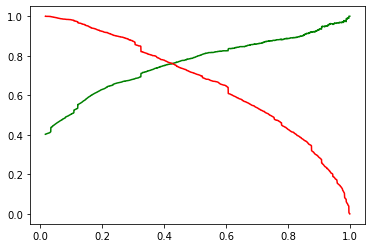

In [110]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [111]:
y_test_predicted = res.predict(x_test_sm)

y_predicted_df = pd.DataFrame(y_test_predicted)

y_test_df = pd.DataFrame(y_test)

y_predicted_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_predicted_final = pd.concat([y_test_df, y_predicted_df],axis=1)

y_predicted_final= y_predicted_final.rename(columns = {0 : 'Conversion_Prob'})
y_predicted_final.head()

,Converted,Conversion_Prob
0,0,0.053108
1,1,0.962960
2,0,0.048342
3,1,0.875446
4,0,0.036900


In [112]:
y_predicted_final['final_predicted'] = y_predicted_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_predicted_final

,Converted,Conversion_Prob,final_predicted
0,0,0.053108,0
1,1,0.962960,1
2,0,0.048342,0
3,1,0.875446,1
4,0,0.036900,0
...,...,...,...
2718,0,0.061691,0
2719,0,0.115929,0
2720,1,0.822820,1
2721,0,0.085077,0


In [120]:
y_test_predicted = res.predict(x_test_sm)    
y_test_predicted[:10]

3271    0.053108
1490    0.962960
7936    0.048342
4216    0.875446
3830    0.036900
1800    0.691565
6507    0.387317
4821    0.321334
4223    0.908005
4714    0.305396
dtype: float64

In [121]:
y_predicted_1 = pd.DataFrame(y_test_predicted)

y_predicted_1.head()

,0
3271,0.053108
1490,0.962960
7936,0.048342
4216,0.875446
3830,0.036900


In [122]:
y_test_df = pd.DataFrame(y_test)

In [123]:
y_test_df['Prospect ID'] = y_test_df.index

In [124]:
y_predicted_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
y_predicted_final = pd.concat([y_test_df, y_predicted_1],axis=1)
y_predicted_final.head()

,Converted,Prospect ID,0
0,0,3271,0.053108
1,1,1490,0.962960
2,0,7936,0.048342
3,1,4216,0.875446
4,0,3830,0.036900


In [126]:
y_predicted_final= y_predicted_final.rename(columns={ 0 : 'Converted_prob'})
y_predicted_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.053108
1,1,1490,0.962960
2,0,7936,0.048342
3,1,4216,0.875446
4,0,3830,0.036900


### 8- Lead score generation

In [132]:
y_predicted_final = y_predicted_final[['Prospect ID','Converted','Converted_prob']]
y_predicted_final['Lead_Score'] = y_predicted_final.Converted_prob.map(lambda x: round(x*100))

y_predicted_final.head(10)

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.053108,5
1,1490,1,0.962960,96
2,7936,0,0.048342,5
3,4216,1,0.875446,88
4,3830,0,0.036900,4
5,1800,1,0.691565,69
6,6507,0,0.387317,39
7,4821,0,0.321334,32
8,4223,1,0.908005,91
9,4714,0,0.305396,31
